## Drive Loading...

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
% cd '/content/drive/MyDrive/Università/Models/MolRNN'
! ls
! nvidia-smi

## Environment Setup

In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
import os
import sys
if not os.path.exists('Miniconda3-py37_4.8.2-Linux-x86_64.sh'):
    ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! python --version

# Add channels
! conda config --add channels conda-forge 
! conda config --add channels anaconda 
! conda config --add channels rdkit 
! conda config --show channels

In [ ]:
# Install CUDA version 9.2
% cd /usr/local/
! pwd
! ls
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604–9–2-local_9.2.88–1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604–9–2-local_9.2.88–1_amd64.deb
!apt-key add /var/cuda-repo-9–2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2
! ls
!rm -rf cuda
!ln -s /usr/local/cuda-9.2 /usr/local/cuda
!stat cuda
% cd '/content/drive/MyDrive/Università/Models/MolRNN'

In [ ]:
! conda install -c rdkit rdkit==2019.03.3.0 -y
! pip install mxnet-cu92==1.3.1
! pip install pandas==0.25.0 scipy==1.5.4 networkx==2.5.1 matplotlib==3.0.0 sklearn==0.0 lmdb==1.2.1 pymysql==1.0.2

In [ ]:
# Info on the OS and the cuda installed version
! lsb_release -a
! export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}
! export LD_LIBRARY_PATH=/usr/local/cuda/lib64\${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
! /usr/local/cuda/bin/nvcc --version

## Code Execution

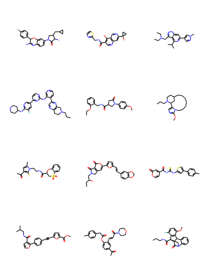

In [ ]:
# Import packages
from train import engine, engine_cond
from test import test_mol_rnn, test_cond_mol_rnn

# Create and train the unconditional molRNN ======================================================================
# params = {'checkpoint_dir': 'checkpoint/mol_rnn', 'is_full': False, 'num_folds': 5, 'fold_id': 0, 'batch_size': 64,
#           'batch_size_test': 32, 'num_workers': 0, 'k': 5, 'p': 0.8, 'embedding_size': 16, 'hidden_sizes': [32, 64, 128, 128, 256, 256],
#           'skip_layer_size': 256, 'dense_layer_sizes': [512], 'policy_layers_size': 128, 'rnn_layers': 3,
#           'activation': 'relu', 'gpu_ids': [0], 'lr': 0.001, 'decay': 0.01, 'decay_step': 100, 'clip_grad': 3.0,
#           'iterations': 9800, 'summary_step': 100, 'file_name': 'datasets/CHEMBL_FULL_DATASET.txt'}
# engine(**params)
# Test the unconditional molRNN
test_mol_rnn(checkpoint_folder='checkpoint/mol_rnn', num_samples=1000, visualize_samples=12, img_name='image000',
             molecules_per_row=3, plot=True)

# # Create and train the molRNN conditioned on SA and QED properties ================================================
# params = {'cond_type': 'prop', 'checkpoint_dir': 'checkpoint/cp_mol_rnn', 'is_full': False, 'num_folds': 5,
#           'fold_id': 0, 'batch_size': 64, 'batch_size_test': 32, 'num_workers': 0, 'k': 5, 'p': 0.8, 'embedding_size': 16, 
#           'hidden_sizes': [32, 64, 128, 128, 256, 256], 'skip_layer_size': 256, 'dense_layer_sizes': [512], 'policy_layers_size': 128, 
#           'rnn_layers': 3, 'num_scaffolds': 0, 'activation': 'relu', 'gpu_ids': [0],
#           'lr': 0.001, 'decay': 0.01, 'decay_step': 100, 'clip_grad': 3.0, 'iterations': 40, 'summary_step': 20,
#           'file_name': 'datasets/ChEMBL_prop.txt'}
# engine_cond(**params)
# # Test the molRNN conditioned on SA and QED properties
# c = [[0.84, 1.9],
#      [0.27, 2.5],
#      [0.84, 3.8],
#      [0.27, 4.8]]
# test_cond_mol_rnn(c, checkpoint_folder='checkpoint/cp_mol_rnn/', num_samples=1000, visualize_samples=12,
#                   img_name='cp_image00', molecules_per_row=4, plot=True, legend='prop')

# # Create and train the molRNN conditioned on measured activity towards molecules ===================================
# params = {'cond_type': 'kinase', 'checkpoint_dir': 'checkpoint/ck_mol_rnn', 'is_full': False, 'num_folds': 5,
#           'fold_id': 0, 'batch_size': 64, 'batch_size_test': 32, 'num_workers': 0, 'k': 5, 'p': 0.8, 'embedding_size': 16, 
#           'hidden_sizes': [32, 64, 128, 128, 256, 256], 'skip_layer_size': 256, 'dense_layer_sizes': [512], 'policy_layers_size': 128,
#           'rnn_layers': 3, 'num_scaffolds': 0, 'activation': 'relu', 'gpu_ids': [0],
#           'lr': 0.001, 'decay': 0.01, 'decay_step': 100, 'clip_grad': 3.0, 'iterations': 400, 'summary_step': 20,
#           'file_name': 'datasets/ChEMBL_k.txt'}
# engine_cond(**params)
# # Test the molRNN conditioned on measured activity towards molecules
# c = [[1, 1],  # GSK-3b(+) & JNK3(+)
#      [1, 0],  # GSK-3b(+) & JNK3(-)
#      [0, 1]]  # GSK-3b(-) & JNK3(+)
# test_cond_mol_rnn(c, checkpoint_folder='checkpoint/ck_mol_rnn/', num_samples=100, visualize_samples=12,
#                   img_name='ck_image00', molecules_per_row=4, plot=True)


## Create Vocabulary

In [ ]:
from rdkit import Chem

##read dataset
with open('datasets/CHEMBL_FULL_DATASET.txt') as f:
    smiles_data = f.readlines()
smiles_data = [x.strip() for x in smiles_data] 

##create atom types
def get_atom_type(atom):
    atom_symbol = atom.GetSymbol()
    atom_charge = atom.GetFormalCharge()
    atom_hs = atom.GetNumExplicitHs()
    return (atom_symbol, atom_charge, atom_hs)

s = set()
for count, smiles in enumerate(smiles_data):
  if count % 1000 == 0:
    print(count)
  mol = Chem.MolFromSmiles(smiles)
  if mol!=None:
    atoms = mol.GetAtoms()
    for at in atoms:
      s.add(get_atom_type(at))

##save to file
with open('atom_types.txt', 'w') as f:
    for item in s:
        f.write("%s,%d,%d\n" % item)

In [ ]:
# Remove duplicate lines in a txt files
def remove_duplicate_lines(source):
  unique_lines = set(open(source).readlines())
  new_file = open(source, 'w')
  new_file.writelines(set(unique_lines))
  new_file.close()

remove_duplicate_lines('datasets/atom_types.txt')